In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
dataset_url="https://www.kaggle.com/competitions/titanic/data"
od.download(dataset_url)

100%|██████████| 34.1k/34.1k [00:00<00:00, 19.2MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/titanic/train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
modes=df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [ ]:
df.fillna(modes,inplace=True)

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
import numpy as np
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

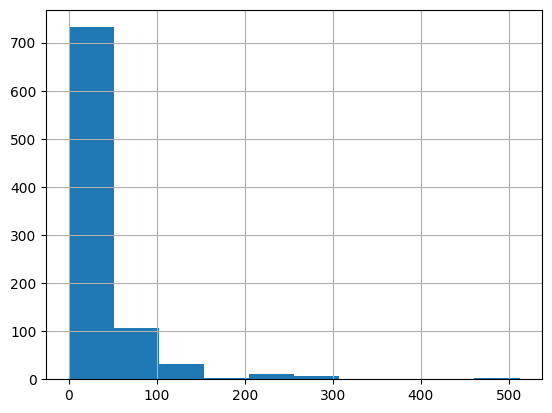

In [ ]:
df['Fare'].hist()

In [ ]:
df['LogFare']=np.log(df['Fare']+1)

<Axes: >

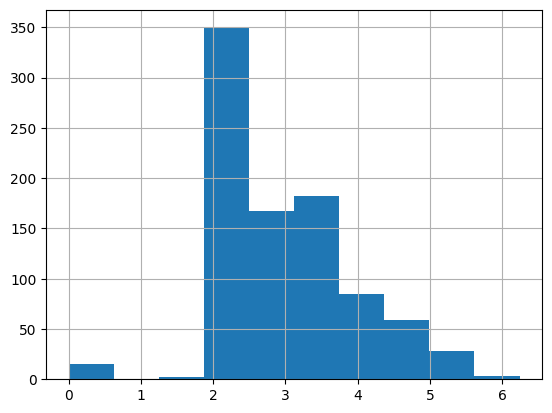

In [ ]:
df['LogFare'].hist()

In [ ]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [ ]:
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [ ]:
from torch import tensor

t_dep = tensor(df.Survived)

In [ ]:
indep_cols=['Age','SibSp','Parch','LogFare']+added_cols
t_indep=tensor(df[indep_cols].values,dtype=torch.float)

In [ ]:
t_indep

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [ ]:
t_indep.shape

torch.Size([891, 12])

In [ ]:
n_coeff=t_indep.shape[1]
coeffs=torch.rand(n_coeff)-0.5
coeffs

tensor([ 0.1219,  0.2072, -0.4995, -0.3681,  0.3636,  0.1184,  0.0272, -0.1665,
         0.3383,  0.4738, -0.4845, -0.4081])

In [ ]:
t_indep*coeffs

tensor([[ 2.6820,  0.2072, -0.0000,  ...,  0.0000, -0.0000, -0.4081],
        [ 4.6326,  0.2072, -0.0000,  ...,  0.4738, -0.0000, -0.0000],
        [ 3.1697,  0.0000, -0.0000,  ...,  0.0000, -0.0000, -0.4081],
        ...,
        [ 2.9259,  0.2072, -0.9990,  ...,  0.0000, -0.0000, -0.4081],
        [ 3.1697,  0.0000, -0.0000,  ...,  0.4738, -0.0000, -0.0000],
        [ 3.9011,  0.0000, -0.0000,  ...,  0.0000, -0.4845, -0.0000]])

In [ ]:
vals,indices=t_indep.max(dim=0)
t_indep=t_indep/vals

In [ ]:
t_indep*coeffs

tensor([[ 0.0335,  0.0259, -0.0000,  ...,  0.0000, -0.0000, -0.4081],
        [ 0.0579,  0.0259, -0.0000,  ...,  0.4738, -0.0000, -0.0000],
        [ 0.0396,  0.0000, -0.0000,  ...,  0.0000, -0.0000, -0.4081],
        ...,
        [ 0.0366,  0.0259, -0.1665,  ...,  0.0000, -0.0000, -0.4081],
        [ 0.0396,  0.0000, -0.0000,  ...,  0.4738, -0.0000, -0.0000],
        [ 0.0488,  0.0000, -0.0000,  ...,  0.0000, -0.4845, -0.0000]])

In [ ]:
preds=(t_indep*coeffs).sum(axis=1)

In [ ]:
preds[:10]

tensor([ 0.2287,  0.4506, -0.0409, -0.4188,  0.2172,  0.1214, -0.1692,  0.1087,
        -0.2240,  0.2702])

In [ ]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.5952)

In [ ]:
def calc_preds(coeffs,indeps):
  return (indeps*coeffs).sum(axis=1)

In [ ]:
def calc_loss(coeffs,indeps,deps):
  return torch.abs(calc_preds(coeffs,indeps)-deps).mean()

In [ ]:
coeffs.requires_grad_()


tensor([ 0.1219,  0.2072, -0.4995, -0.3681,  0.3636,  0.1184,  0.0272, -0.1665,
         0.3383,  0.4738, -0.4845, -0.4081], requires_grad=True)

In [ ]:
loss=calc_loss(coeffs,t_indep,t_dep)


In [ ]:
loss

tensor(0.5952, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()

In [ ]:
coeffs.grad

tensor([-0.0894, -0.0182, -0.0378, -0.1594,  0.1178, -0.3322, -0.1728, -0.1886,
         0.1470, -0.0067, -0.0056, -0.2020])

In [ ]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.1788, -0.0365, -0.0756, -0.3188,  0.2357, -0.6644, -0.3457, -0.3771,
         0.2941, -0.0135, -0.0112, -0.4040])

In [ ]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.5156)


In [ ]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [ ]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [ ]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [ ]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [ ]:
def init_coeffs():
  return (torch.rand(n_coeff)-0.5).requires_grad_()

In [ ]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [ ]:
coeffs = train_model(18, lr=0.2)

0.536; 0.502; 0.477; 0.454; 0.431; 0.409; 0.388; 0.367; 0.349; 0.336; 0.330; 0.326; 0.329; 0.304; 0.314; 0.296; 0.300; 0.289; 

In [ ]:
def show_coeffs():
  return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.2694),
 'SibSp': tensor(0.0901),
 'Parch': tensor(0.2359),
 'LogFare': tensor(0.0280),
 'Sex_male': tensor(-0.3990),
 'Sex_female': tensor(0.2345),
 'Pclass_1': tensor(0.7232),
 'Pclass_2': tensor(0.4112),
 'Pclass_3': tensor(0.3601),
 'Embarked_C': tensor(0.0955),
 'Embarked_Q': tensor(0.2395),
 'Embarked_S': tensor(0.2122)}

In [ ]:
preds = calc_preds(coeffs, val_indep)

In [ ]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False,  True,  True, False])

In [ ]:
results.float().mean()

tensor(0.7865)

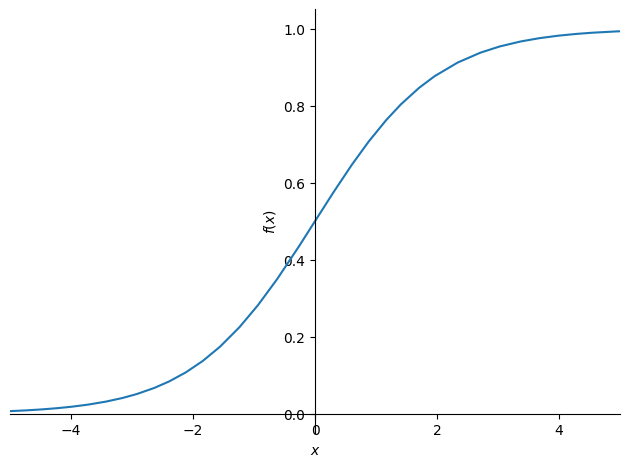

In [ ]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [ ]:
def calc_preds(coeffs, indeps):
  return torch.sigmoid((indeps*coeffs).sum(axis=1))


In [ ]:
coeffs = train_model(lr=100)

0.510; 0.327; 0.294; 0.207; 0.201; 0.199; 0.198; 0.197; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 